In [89]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import ipywidgets as widgets

import os
cascPathface = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalcatface_extended.xml"
cascPatheyes = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_eye_tree_eyeglasses.xml"

In [90]:
def show(img):
    plt.figure(figsize=(7, 7))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

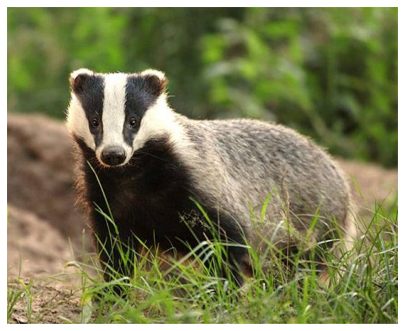

In [111]:
bar = cv.imread('barsuk.jpeg')

bur = cv.imread('burunduk.jpeg')

bar = cv.cvtColor(bar, cv2.COLOR_BGR2RGB)

bur = cv.cvtColor(bur, cv2.COLOR_BGR2RGB)

show(bar)

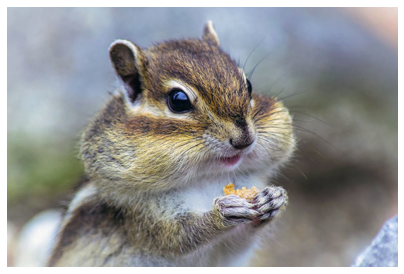

In [112]:
show(bur)

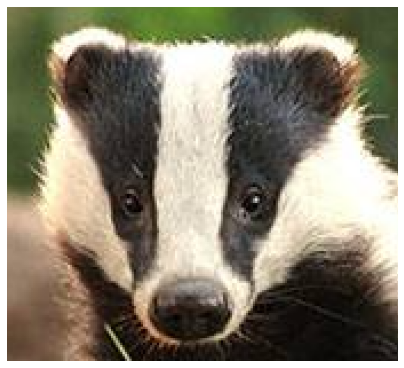

In [118]:
ba_face = cv.imread('bar_face.png')
ba_face = cv.cvtColor(ba_face, cv2.COLOR_BGR2RGB)
w, h = ba_face.shape[:2][::-1]
show(ba_face)

In [119]:
ba_face.shape

(310, 342, 3)

In [120]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

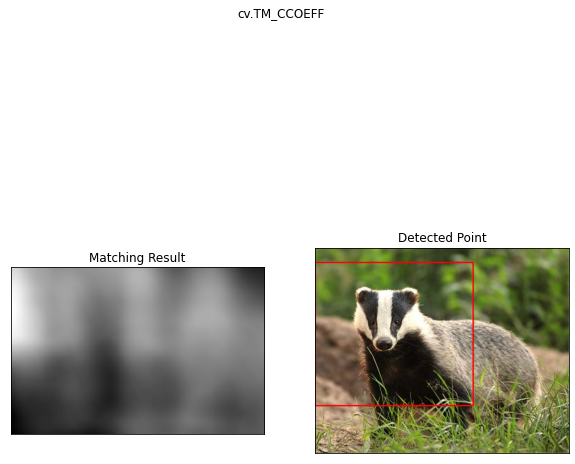

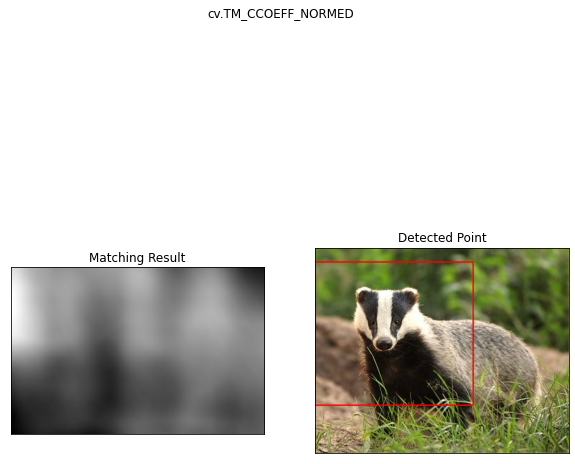

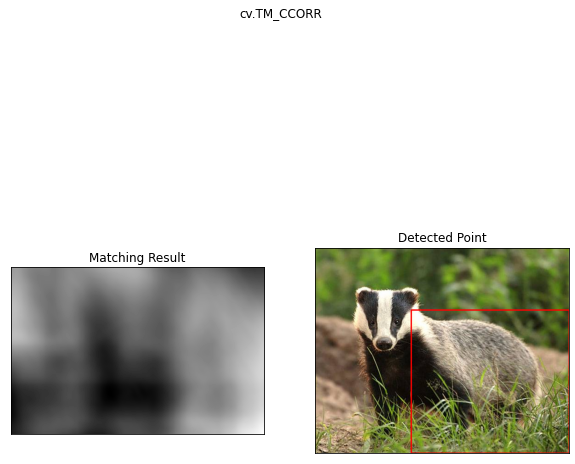

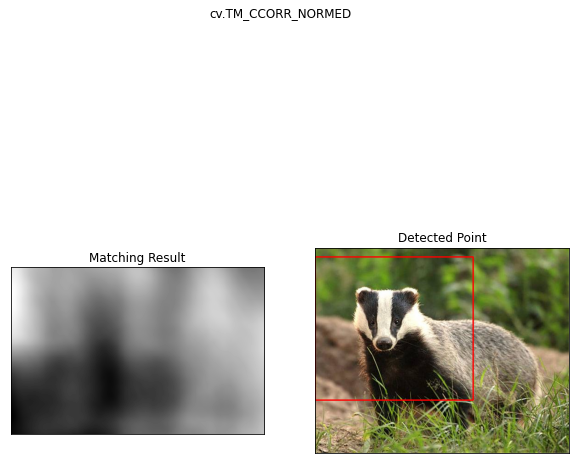

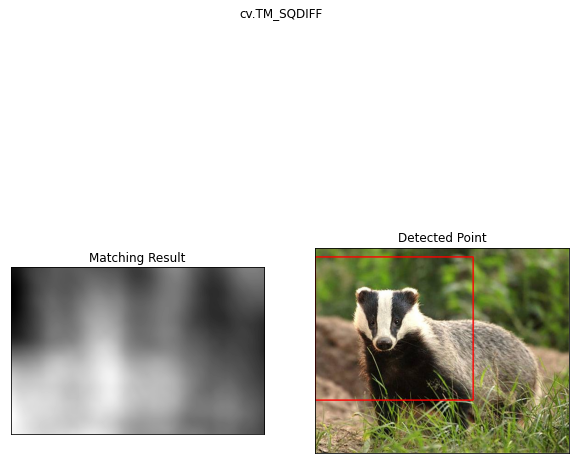

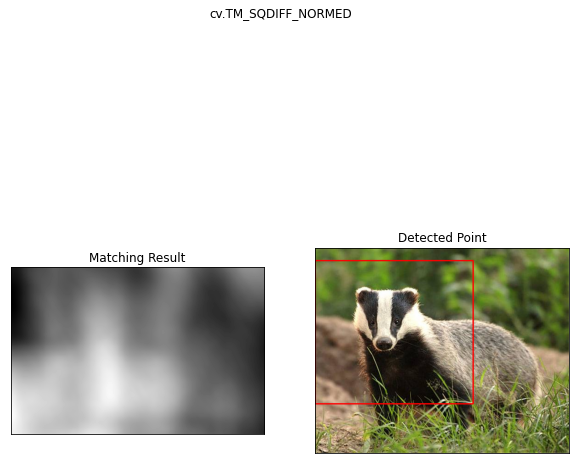

In [121]:
for meth in methods:
    img = bar.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,ba_face,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

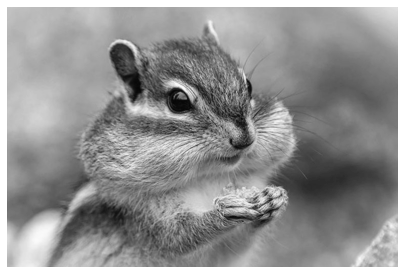

In [101]:
faceCascade = cv2.CascadeClassifier(cascPathface)

faces = faceCascade.detectMultiScale(bur,
                                     scaleFactor=1.2,
                                     minNeighbors=20,
                                     minSize=(20, 20),
                                     flags=cv2.CASCADE_SCALE_IMAGE)

for (x,y,w,h) in faces:
    cv2.rectangle(bar, (x, y), (x + w, y + h), (0,255,0), 2)

show(bur)

In [146]:
def findMeanRGB(img):
    return np.mean(np.mean(np.mean(img, axis=0), axis=1))

In [147]:
ba1 = cv.cvtColor(cv.imread('./bas/ba1.jpeg'), cv2.COLOR_BGR2RGB)

ba2 = cv.cvtColor(cv.imread('./bas/ba2.jpeg'), cv2.COLOR_BGR2RGB)

ba3 = cv.cvtColor(cv.imread('./bas/ba3.jpeg'), cv2.COLOR_BGR2RGB)

In [148]:
findMeanRGB(ba1)

69.83069166666667

In [149]:
findMeanRGB(ba2)

81.38584533863222

In [150]:
findMeanRGB(ba3)

100.11804321239299

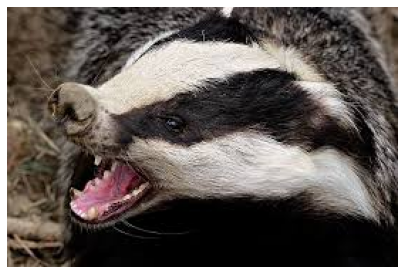

In [170]:
show(ba2)

In [151]:
bu1 = cv.cvtColor(cv.imread('./bus/bu1.jpeg'), cv2.COLOR_BGR2RGB)

bu2 = cv.cvtColor(cv.imread('./bus/bu2.jpeg'), cv2.COLOR_BGR2RGB)

bu3 = cv.cvtColor(cv.imread('./bus/bu3.jpeg'), cv2.COLOR_BGR2RGB)

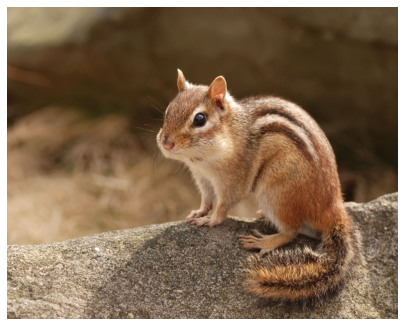

In [168]:
show(bu3)

In [154]:
findMeanRGB(bu1)

119.93608943089431

In [155]:
findMeanRGB(bu2)

104.11810705315547

In [156]:
findMeanRGB(bu3)

94.96382391650695

In [232]:
def ba_or_bu(img):
    brown = (155, 103, 60)
    
    
    num = findMeanRGB(img)
    if 94 < num < 105:
        numPixels = img.shape[0] * img.shape[1]
        threshold = 30
        howBrown = 0
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                pixel = img[x, y]
                if (brown[0] - threshold < pixel[0] < brown[0] + threshold) and (brown[1] - threshold < pixel[1] < brown[1] + threshold) and (brown[2] - threshold < pixel[2] < brown[2] + threshold):
                    howBrown += 1
    
        brownity = 100 * howBrown / numPixels
        if brownity > 5.:
            return "Бурундук"
        else:
            return "Барсук"  
    
    return "Барсук" if findMeanRGB(img) <= 100 else "Бурундук"

In [233]:
ba_or_bu(ba1)

69.83069166666667


'Барсук'

In [234]:
ba_or_bu(ba2)

81.38584533863222


'Барсук'

In [235]:
ba_or_bu(ba3)

100.11804321239299


'Барсук'

In [236]:
ba_or_bu(bu1)

119.93608943089431


'Бурундук'

In [237]:
ba_or_bu(bu2)

104.11810705315547


'Бурундук'

In [238]:
ba_or_bu(bu3)

94.96382391650695


'Бурундук'

In [239]:
bu4 = cv.cvtColor(cv.imread('./bus/bu4.jpeg'), cv2.COLOR_BGR2RGB)

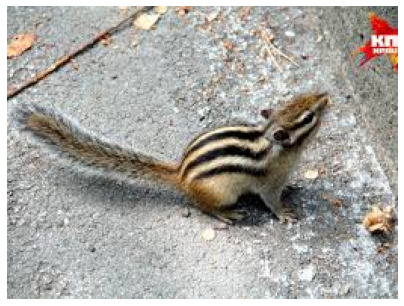

In [172]:
show(bu4)

In [173]:
ba_or_bu(bu4)

'Бурундук'

In [184]:
for x in range(bu4.shape[0]):
    for y in range(bu4.shape[1]):
        print(bu4[x, y])

[154 162 164]
[124 132 134]
[137 145 147]
[148 156 158]
[147 155 157]
[197 205 207]
[222 230 232]
[168 176 178]
[139 147 149]
[137 145 147]
[159 167 169]
[138 146 148]
[104 112 114]
[119 127 129]
[144 152 154]
[160 168 170]
[135 140 146]
[132 137 143]
[149 154 160]
[166 171 177]
[168 173 179]
[175 180 186]
[178 181 186]
[163 166 171]
[168 169 174]
[172 173 178]
[145 146 150]
[142 143 147]
[147 148 152]
[158 159 163]
[189 189 191]
[184 185 187]
[167 172 175]
[161 169 171]
[182 191 190]
[192 201 200]
[200 206 206]
[198 204 204]
[177 183 181]
[179 185 183]
[180 184 183]
[156 160 159]
[179 184 180]
[188 193 189]
[192 194 191]
[212 214 211]
[204 206 201]
[190 195 189]
[185 190 186]
[176 182 178]
[184 190 186]
[186 192 188]
[203 209 205]
[204 210 206]
[185 191 187]
[212 218 214]
[214 220 216]
[212 218 214]
[201 207 203]
[187 193 189]
[188 194 190]
[197 203 199]
[192 198 194]
[179 184 178]
[202 205 198]
[193 196 187]
[202 205 198]
[212 217 210]
[207 213 209]
[205 211 207]
[195 200 194]
[171 1

[194 203 202]
[179 188 187]
[177 183 183]
[185 191 191]
[173 179 177]
[172 178 176]
[179 183 182]
[200 204 203]
[192 197 193]
[187 192 188]
[174 176 173]
[163 165 162]
[192 194 189]
[207 209 204]
[176 181 177]
[181 186 182]
[197 202 198]
[203 208 204]
[187 192 188]
[183 188 184]
[187 192 188]
[173 178 174]
[181 186 182]
[189 194 190]
[191 196 192]
[185 190 186]
[184 189 185]
[190 195 191]
[190 195 191]
[185 190 184]
[181 183 178]
[178 181 174]
[191 193 188]
[197 199 194]
[186 188 183]
[184 186 181]
[185 188 181]
[173 176 169]
[186 186 178]
[158 154 143]
[157 151 139]
[213 204 189]
[216 205 187]
[218 203 184]
[187 170 150]
[170 157 138]
[209 203 189]
[218 214 202]
[190 184 168]
[184 177 159]
[192 181 161]
[143 131 109]
[121 106  83]
[162 147 124]
[165 153 129]
[147 136 116]
[143 136 117]
[155 152 135]
[149 150 136]
[141 144 133]
[169 176 168]
[217 222 215]
[195 196 188]
[180 176 165]
[152 143 126]
[149 137 113]
[213 198 169]
[225 210 177]
[224 213 181]
[231 226 197]
[160 162 140]
[158 1

[255 254 239]
[247 243 231]
[125 126 118]
[94 99 93]
[136 145 142]
[187 197 196]
[178 188 189]
[171 180 179]
[187 196 195]
[197 203 201]
[207 211 212]
[172 177 180]
[186 191 195]
[190 197 203]
[169 180 184]
[174 193 191]
[154 170 167]
[160 169 164]
[172 171 166]
[182 171 165]
[183 166 158]
[186 166 157]
[188 170 158]
[166 156 144]
[198 195 180]
[198 201 190]
[194 201 193]
[230 241 237]
[186 198 198]
[130 141 145]
[150 158 160]
[163 164 158]
[196 192 181]
[216 206 197]
[132 118 109]
[131 113 103]
[220 200 189]
[252 232 221]
[189 173 158]
[131 120 102]
[165 158 139]
[130 123 104]
[123 115  96]
[219 206 190]
[197 179 165]
[153 129 117]
[183 163 154]
[180 176 167]
[165 168 161]
[184 187 180]
[185 188 181]
[215 218 209]
[217 220 211]
[204 205 197]
[173 175 164]
[217 214 205]
[251 247 238]
[176 167 158]
[151 138 130]
[175 158 151]
[148 129 123]
[147 124 118]
[151 133 129]
[172 168 169]
[141 145 148]
[161 170 169]
[190 201 197]
[217 228 222]
[198 208 200]
[177 182 175]
[166 166 158]
[164 155 

[101 112 104]
[104 114 106]
[139 141 138]
[152 154 151]
[144 146 143]
[132 134 131]
[155 157 154]
[161 163 160]
[173 175 172]
[146 148 145]
[167 169 166]
[175 177 174]
[184 186 183]
[160 162 159]
[192 194 191]
[142 144 141]
[137 139 136]
[149 150 145]
[142 135 127]
[181 172 163]
[159 150 143]
[85 78 70]
[115 108 102]
[176 171 165]
[217 214 209]
[208 205 200]
[166 165 161]
[157 157 155]
[140 142 141]
[144 145 147]
[168 172 173]
[177 181 184]
[170 175 178]
[172 177 180]
[164 172 174]
[158 166 168]
[169 178 177]
[177 186 185]
[200 206 206]
[197 203 203]
[168 174 172]
[184 190 188]
[189 193 192]
[178 182 181]
[163 168 164]
[179 184 180]
[174 176 173]
[145 147 144]
[147 149 144]
[150 152 147]
[174 174 172]
[198 198 196]
[177 177 175]
[176 176 174]
[179 179 177]
[179 179 177]
[161 161 159]
[187 187 185]
[219 219 217]
[191 191 189]
[181 181 179]
[209 209 207]
[209 209 207]
[166 166 164]
[181 181 179]
[207 207 205]
[192 194 193]
[203 205 202]
[205 205 203]
[196 195 190]
[194 191 186]
[207 203 

[200 194 178]
[204 202 187]
[176 178 165]
[180 183 176]
[180 182 179]
[201 201 203]
[173 171 176]
[157 155 160]
[196 190 194]
[184 178 180]
[216 212 213]
[209 205 204]
[191 190 186]
[204 205 200]
[227 229 224]
[245 250 244]
[208 214 210]
[186 195 190]
[183 194 190]
[229 241 239]
[227 239 237]
[182 196 196]
[187 201 202]
[198 207 206]
[176 172 169]
[159 150 143]
[207 200 190]
[190 184 172]
[189 183 169]
[173 166 150]
[196 187 170]
[206 193 177]
[206 188 174]
[198 178 167]
[197 178 171]
[222 207 200]
[251 242 237]
[226 222 219]
[166 168 165]
[146 145 141]
[121 107 104]
[128 110 106]
[139 125 122]
[140 130 128]
[149 144 141]
[140 139 137]
[122 122 124]
[144 145 147]
[178 179 181]
[139 140 142]
[170 171 173]
[173 173 173]
[179 179 177]
[166 167 162]
[157 159 154]
[133 134 128]
[169 168 164]
[159 156 151]
[159 156 151]
[126 123 118]
[123 118 112]
[169 164 158]
[175 170 164]
[156 152 143]
[132 125 117]
[181 177 168]
[171 167 158]
[133 129 118]
[162 158 147]
[201 199 187]
[172 170 158]
[115 1

[141 146 140]
[160 162 157]
[178 177 175]
[212 206 208]
[230 224 226]
[232 227 231]
[236 236 238]
[232 238 238]
[200 210 209]
[155 164 159]
[164 164 156]
[187 183 174]
[154 151 144]
[146 142 139]
[190 189 187]
[184 184 186]
[168 169 173]
[210 211 216]
[169 170 174]
[154 155 157]
[158 158 158]
[172 171 167]
[135 132 123]
[174 172 159]
[200 197 180]
[189 186 171]
[168 168 158]
[148 149 141]
[137 138 130]
[163 164 156]
[185 186 178]
[182 183 175]
[152 153 145]
[152 153 145]
[166 167 159]
[147 148 140]
[150 151 143]
[155 156 148]
[140 141 133]
[137 138 130]
[116 117 109]
[149 151 140]
[142 142 130]
[141 139 127]
[142 135 125]
[168 164 153]
[164 166 153]
[126 137 121]
[113 132 113]
[106 125 106]
[106 114 101]
[104  99  93]
[56 34 36]
[52 25 30]
[150 127 135]
[154 143 149]
[120 129 128]
[127 138 130]
[141 139 124]
[188 171 153]
[232 195 179]
[254 181 175]
[255 140 148]
[160  26  33]
[224 123 115]
[248 159 145]
[255 162 150]
[228 115 107]
[255 145 140]
[255 155 154]
[255 160 161]
[255 149 150

[158 159 151]
[155 161 157]
[187 197 198]
[202 213 219]
[184 194 203]
[193 201 212]
[221 225 237]
[229 231 243]
[229 226 235]
[163 156 164]
[145 135 143]
[160 157 164]
[156 164 175]
[180 194 203]
[159 172 180]
[167 176 181]
[172 177 180]
[191 191 189]
[201 196 190]
[255 251 240]
[206 193 177]
[195 178 160]
[225 205 181]
[167 143 117]
[255 231 204]
[230 203 174]
[139 110  80]
[85 63 39]
[80 67 59]
[124 120 119]
[133 133 131]
[139 144 140]
[170 179 174]
[175 184 179]
[141 148 141]
[132 134 129]
[142 138 135]
[133 125 122]
[137 125 125]
[162 152 150]
[131 123 120]
[136 135 130]
[127 130 123]
[183 186 179]
[170 167 162]
[206 201 197]
[191 187 184]
[171 170 168]
[193 193 193]
[190 191 193]
[173 174 178]
[184 188 191]
[212 216 217]
[210 214 215]
[202 204 203]
[162 163 158]
[134 133 128]
[215 212 203]
[255 254 243]
[207 205 193]
[126 126 116]
[136 137 129]
[122 123 115]
[151 152 144]
[180 181 173]
[143 144 136]
[152 153 145]
[201 202 194]
[185 186 178]
[151 152 144]
[130 131 123]
[164 165 157

[192 196 195]
[182 188 188]
[184 192 194]
[172 182 184]
[185 195 197]
[203 213 215]
[179 189 190]
[152 162 163]
[151 160 159]
[137 143 143]
[163 167 166]
[164 166 163]
[146 147 141]
[169 169 161]
[183 180 171]
[222 218 207]
[251 244 234]
[228 209 194]
[234 192 168]
[255 203 179]
[217 171 148]
[170 129 111]
[205 173 160]
[150 125 118]
[181 166 161]
[139 131 128]
[189 185 184]
[189 189 189]
[195 199 198]
[219 225 223]
[250 255 251]
[250 255 249]
[213 218 211]
[151 152 144]
[148 144 135]
[148 141 133]
[163 156 148]
[156 152 143]
[162 158 149]
[182 178 169]
[190 187 178]
[210 207 198]
[178 175 166]
[183 181 169]
[173 169 157]
[238 235 220]
[191 185 169]
[145 139 123]
[210 203 185]
[210 202 189]
[146 137 132]
[184 179 176]
[230 229 225]
[176 178 173]
[143 150 143]
[160 167 159]
[144 146 141]
[167 166 161]
[164 156 153]
[168 158 156]
[164 150 147]
[160 149 145]
[157 148 143]
[206 201 195]
[191 191 183]
[197 198 190]
[210 209 207]
[187 185 186]
[177 175 176]
[178 178 178]
[163 164 166]
[195 1

[175 175 173]
[176 180 183]
[240 247 253]
[164 173 180]
[178 187 194]
[160 165 169]
[165 166 168]
[195 191 188]
[153 146 140]
[208 199 192]
[207 198 193]
[181 176 173]
[203 201 202]
[215 218 223]
[163 168 172]
[174 180 180]
[141 147 145]
[167 173 171]
[187 191 190]
[193 195 194]
[185 185 185]
[156 155 153]
[170 164 164]
[160 152 150]
[168 158 157]
[192 180 180]
[191 177 177]
[176 160 160]
[192 174 174]
[178 158 159]
[114  96  92]
[60 48 36]
[54 47 31]
[42 36 22]
[50 46 35]
[54 54 46]
[73 74 69]
[131 133 130]
[160 166 166]
[169 174 177]
[170 178 181]
[166 174 177]
[185 193 196]
[181 189 192]
[156 161 165]
[210 215 218]
[202 203 207]
[186 184 189]
[200 195 199]
[182 180 183]
[193 191 192]
[190 190 188]
[196 197 192]
[191 192 187]
[182 183 177]
[189 190 184]
[182 183 175]
[187 187 179]
[193 193 185]
[185 182 175]
[179 176 169]
[195 190 186]
[211 210 206]
[205 211 209]
[218 227 222]
[207 209 204]
[197 197 189]
[230 226 215]
[173 169 158]
[190 187 180]
[200 200 198]
[200 205 208]
[176 185 1

[124 101 107]
[186 161 167]
[178 157 162]
[169 153 156]
[181 171 172]
[202 198 197]
[176 178 175]
[174 180 176]
[145 152 145]
[185 185 177]
[180 176 167]
[166 163 154]
[157 154 145]
[167 164 155]
[158 155 146]
[188 185 178]
[188 185 178]
[192 191 186]
[174 173 168]
[159 160 154]
[191 192 186]
[189 190 184]
[158 159 153]
[157 158 153]
[155 151 148]
[127 116 120]
[124 115 116]
[143 145 132]
[163 154 137]
[148 106  92]
[181 138 122]
[149 132 112]
[139 140 122]
[147 155 144]
[140 149 144]
[136 142 142]
[151 157 155]
[88 98 89]
[112  68  69]
[184  27  56]
[240  36  69]
[194   7  18]
[182  13  10]
[169  17  14]
[189  60  55]
[188  86  82]
[173  98  93]
[157 106 105]
[151 117 118]
[161 140 139]
[152 137 130]
[144 127 111]
[163 142 113]
[152 123  79]
[157 121  61]
[181 137  64]
[212 148  61]
[255 163  62]
[204  89   0]
[252 135  29]
[58 25  8]
[103  70  53]
[88 56 43]
[153 123 112]
[204 177 166]
[226 204 193]
[180 161 154]
[190 175 168]
[195 184 180]
[177 169 166]
[177 173 170]
[151 151 151]
[

[177 179 178]
[181 183 182]
[182 184 183]
[176 178 177]
[197 199 198]
[181 183 182]
[207 211 210]
[197 201 200]
[156 160 159]
[169 173 172]
[169 175 173]
[179 185 183]
[159 165 165]
[160 166 166]
[210 218 220]
[234 242 244]
[188 196 198]
[191 201 202]
[235 243 245]
[232 242 243]
[181 191 192]
[183 185 184]
[155 140 135]
[157 137 128]
[203 189 178]
[206 196 184]
[167 161 147]
[197 194 179]
[214 208 196]
[172 164 153]
[224 211 202]
[208 194 185]
[213 199 190]
[163 150 142]
[97 87 78]
[183 179 168]
[191 191 179]
[173 176 167]
[179 184 180]
[159 163 164]
[163 165 164]
[162 164 163]
[190 190 188]
[168 169 164]
[160 159 155]
[172 171 167]
[172 171 167]
[161 161 159]
[186 188 187]
[186 190 191]
[182 187 190]
[207 215 217]
[234 243 248]
[191 195 196]
[195 188 178]
[241 229 213]
[249 237 223]
[211 199 185]
[180 170 158]
[168 158 146]
[215 207 196]
[214 208 196]
[221 214 204]
[201 197 186]
[181 178 169]
[205 202 193]
[192 192 184]
[146 146 138]
[178 177 172]
[246 245 240]
[187 186 184]
[176 175 

[152 149 134]
[149 145 134]
[132 129 122]
[126 126 118]
[142 144 133]
[146 150 136]
[130 134 117]
[128 117  99]
[193 147 132]
[187 117 107]
[169  89  80]
[142 141 137]
[166 165 161]
[216 215 211]
[248 247 243]
[222 221 217]
[118 117 115]
[138 134 133]
[140 136 135]
[132 128 127]
[174 170 169]
[186 182 183]
[191 187 188]
[191 185 187]
[177 171 173]
[199 193 195]
[209 204 208]
[170 171 175]
[171 175 178]
[161 161 161]
[128 124 121]
[178 169 162]
[178 165 156]
[176 160 145]
[211 192 175]
[215 193 172]
[209 185 161]
[196 170 145]
[152 126 101]
[97 73 47]
[36 12  0]
[40 16  0]
[111  98  81]
[59 68 67]
[ 81 100 107]
[156 175 182]
[174 192 202]
[177 194 204]
[172 186 197]
[179 189 201]
[133 141 152]
[121 125 136]
[155 155 163]
[157 155 158]
[193 188 185]
[213 204 199]
[201 188 180]
[204 190 181]
[198 188 179]
[188 189 183]
[184 189 185]
[170 175 171]
[162 167 163]
[176 181 177]
[189 194 190]
[187 192 188]
[184 189 185]
[163 168 164]
[152 157 153]
[160 165 161]
[171 176 172]
[142 147 143]
[172

[198 189 174]
[197 190 172]
[159 160 144]
[127 145 131]
[138 159 152]
[140 148 151]
[137 129 140]
[151 127 140]
[126 105 110]
[133 133 121]
[135 149 126]
[132 150 124]
[131 145 120]
[144 140 128]
[184 174 172]
[135 135 137]
[151 157 157]
[140 151 143]
[164 178 163]
[155 170 151]
[134 149 128]
[184 199 176]
[145 160 139]
[114 127 110]
[121 133 121]
[160 167 160]
[136 142 140]
[142 146 147]
[130 132 131]
[86 87 82]
[97 97 87]
[136 137 121]
[138 135 116]
[163 154 139]
[155 139 126]
[143 121 110]
[152 154 141]
[156 160 146]
[235 237 224]
[189 192 181]
[100 102  91]
[156 159 150]
[149 150 142]
[158 161 154]
[174 176 171]
[185 187 182]
[207 209 206]
[193 195 192]
[132 134 133]
[166 168 167]
[186 187 189]
[176 172 169]
[255 252 241]
[245 224 207]
[200 173 154]
[149 117  94]
[204 165 136]
[200 157 123]
[180 135  96]
[193 148 109]
[111  69  31]
[58 22  0]
[167 140 113]
[151 134 114]
[170 162 151]
[194 196 191]
[183 191 193]
[170 182 182]
[176 185 182]
[186 191 187]
[189 191 186]
[183 184 179]
[

[184 188 187]
[190 194 193]
[202 206 205]
[201 205 204]
[200 204 203]
[188 192 191]
[162 166 165]
[195 199 198]
[190 194 193]
[181 185 184]
[199 203 202]
[187 191 190]
[186 190 189]
[176 180 179]
[187 191 190]
[167 171 170]
[181 185 184]
[198 202 201]
[174 178 177]
[174 178 177]
[197 201 200]
[178 182 181]
[161 165 164]
[182 186 185]
[192 196 195]
[182 186 185]
[177 181 180]
[148 152 151]
[119 123 122]
[148 152 151]
[184 188 187]
[169 173 172]
[168 172 171]
[175 179 178]
[198 202 201]
[162 166 165]
[182 186 185]
[221 225 224]
[213 219 219]
[199 209 210]
[186 196 198]
[179 187 189]
[192 198 198]
[205 209 208]
[184 186 183]
[202 203 198]
[182 183 178]
[202 201 197]
[206 207 202]
[187 189 186]
[164 168 167]
[204 210 210]
[179 187 189]
[160 170 172]
[164 175 177]
[132 143 145]
[165 177 177]
[174 184 183]
[180 189 186]
[178 183 177]
[179 182 175]
[211 211 201]
[156 152 141]
[229 223 209]
[220 213 197]
[222 213 198]
[225 216 199]
[155 146 129]
[157 148 131]
[163 154 137]
[159 151 138]
[177 1

[192 196 195]
[194 198 197]
[198 202 201]
[166 170 169]
[188 192 191]
[186 190 189]
[189 193 192]
[179 183 182]
[169 173 172]
[186 190 189]
[185 189 188]
[171 175 174]
[184 188 187]
[170 174 173]
[158 162 161]
[170 174 173]
[132 136 135]
[155 159 158]
[193 197 196]
[172 176 175]
[200 204 203]
[177 181 180]
[182 186 185]
[177 181 180]
[177 181 180]
[182 186 185]
[203 209 209]
[173 181 183]
[196 204 206]
[196 205 204]
[163 169 167]
[183 187 186]
[188 190 187]
[203 204 199]
[223 224 219]
[167 168 163]
[179 180 175]
[216 218 215]
[231 236 232]
[187 193 193]
[182 191 190]
[141 149 151]
[124 133 132]
[181 187 185]
[120 125 119]
[215 218 211]
[223 224 216]
[182 182 172]
[123 121 109]
[128 124 112]
[140 136 124]
[145 139 127]
[142 136 124]
[171 167 155]
[210 208 196]
[171 168 159]
[162 162 152]
[171 172 164]
[183 184 176]
[139 142 135]
[182 184 179]
[195 197 192]
[167 172 168]
[131 137 135]
[141 147 145]
[183 189 189]
[167 173 171]
[180 186 186]
[157 161 160]
[181 183 180]
[181 182 177]
[217 2

[191 195 194]
[171 175 174]
[163 167 166]
[206 210 209]
[205 209 208]
[182 186 185]
[185 189 188]
[225 229 228]
[210 214 213]
[189 193 192]
[184 188 187]
[175 179 178]
[199 203 202]
[203 207 206]
[185 189 188]
[152 156 155]
[155 159 158]
[145 149 148]
[156 160 159]
[160 164 163]
[195 199 198]
[187 191 190]
[188 192 191]
[192 196 195]
[195 199 198]
[188 192 191]
[192 196 195]
[193 197 196]
[185 189 188]
[180 184 183]
[187 191 190]
[187 191 190]
[176 180 179]
[193 197 196]
[219 223 222]
[169 173 172]
[182 186 185]
[211 215 214]
[155 159 158]
[157 161 160]
[142 144 141]
[146 145 140]
[176 175 170]
[184 183 178]
[169 170 165]
[165 167 164]
[160 162 159]
[153 157 156]
[171 175 174]
[206 210 209]
[221 225 224]
[176 178 175]
[191 193 190]
[180 181 176]
[165 164 159]
[156 155 150]
[147 144 137]
[174 171 164]
[133 130 121]
[243 239 230]
[198 194 183]
[137 130 120]
[200 193 183]
[139 132 122]
[148 141 131]
[185 181 172]
[194 191 184]
[154 153 148]
[198 200 197]
[205 209 208]
[219 225 225]
[241 2

[138 138 128]
[128 128 118]
[130 130 120]
[120 120 110]
[130 130 120]
[150 150 140]
[149 149 139]
[181 181 171]
[152 152 142]
[154 154 144]
[143 143 133]
[110 112 101]
[116 117 109]
[136 139 130]
[147 150 141]
[105 111 101]
[164 172 161]
[161 168 160]
[220 230 222]
[241 252 248]
[247 255 255]
[193 205 203]
[179 191 191]
[170 182 182]
[150 160 161]
[182 190 192]
[202 208 208]
[203 207 206]
[194 196 195]
[209 209 207]
[191 191 189]
[233 233 231]
[199 200 195]
[228 228 226]
[239 239 237]
[212 212 210]
[199 201 198]
[201 203 200]
[167 169 168]
[182 186 185]
[187 191 190]
[192 196 197]
[191 195 196]
[186 191 194]
[191 196 199]
[184 189 192]
[167 173 173]
[170 172 171]
[191 193 192]
[187 189 188]
[171 173 172]
[195 197 196]
[189 191 190]
[201 203 202]
[199 201 200]
[180 182 181]
[182 184 183]
[202 204 203]
[192 194 193]
[196 198 197]
[177 179 178]
[179 181 180]
[190 194 193]
[213 217 216]
[189 195 193]
[209 213 212]
[195 199 198]
[218 223 219]
[198 203 199]
[189 191 188]
[195 197 194]
[173 1

[172 172 170]
[201 201 199]
[170 170 168]
[177 177 175]
[107 109 106]
[165 170 166]
[169 174 170]
[133 137 136]
[173 178 174]
[172 176 175]
[174 179 175]
[149 153 152]
[152 157 153]
[182 186 185]
[86 91 87]
[197 201 200]
[156 161 157]
[174 178 177]
[167 172 168]
[199 203 202]
[216 220 219]
[150 152 151]
[173 173 173]
[181 180 178]
[149 148 146]
[162 161 159]
[166 165 163]
[155 151 150]
[230 224 224]
[204 198 198]
[245 236 237]
[225 217 215]
[213 205 203]
[206 196 195]
[194 184 183]
[170 160 159]
[191 181 179]
[176 171 167]
[183 178 172]
[183 176 166]
[182 174 163]
[178 169 154]
[187 174 157]
[186 170 147]
[181 164 138]
[168 147 118]
[129 104  74]
[116  89  59]
[103  72  43]
[118  85  54]
[96 61 31]
[122  85  56]
[144 108  76]
[155 120  82]
[121  86  46]
[103  70  29]
[113  81  40]
[143 111  72]
[102  74  34]
[74 49  9]
[73 49 11]
[113  93  58]
[140 124  91]
[151 137 108]
[143 131 105]
[123 115  92]
[85 78 59]
[49 42 24]
[42 33 16]
[58 45 29]
[47 31 18]
[105  87  75]
[122 106  93]
[134 

[181 178 169]
[119 116 107]
[151 148 139]
[156 153 144]
[148 145 136]
[167 164 155]
[165 162 155]
[186 183 174]
[189 186 179]
[189 186 177]
[192 189 180]
[129 126 117]
[149 146 137]
[113 110 101]
[164 161 152]
[174 171 162]
[188 185 176]
[209 206 197]
[171 168 159]
[165 162 153]
[149 149 139]
[150 150 140]
[133 133 123]
[148 148 138]
[153 153 143]
[132 132 122]
[153 153 143]
[132 132 122]
[167 167 157]
[137 137 127]
[117 117 107]
[130 130 120]
[150 150 140]
[158 158 148]
[171 171 161]
[165 165 155]
[137 137 127]
[124 124 114]
[150 150 140]
[225 226 228]
[217 218 220]
[185 189 192]
[165 169 172]
[171 176 180]
[161 166 170]
[133 138 142]
[119 124 128]
[125 130 134]
[111 116 120]
[105 109 112]
[ 96 100 103]
[89 90 92]
[121 121 121]
[112 112 112]
[135 134 132]
[70 65 59]
[136 132 123]
[181 176 170]
[147 142 136]
[132 129 124]
[133 130 125]
[134 130 127]
[101 100  98]
[135 133 136]
[140 138 143]
[163 162 168]
[164 163 169]
[144 143 151]
[198 197 205]
[112 112 122]
[178 181 190]
[225 232 238

[152 142 130]
[146 136 111]
[142 131 101]
[131 120  90]
[125 114  84]
[135 126  97]
[153 143 116]
[159 149 124]
[153 145 122]
[168 160 139]
[156 148 129]
[147 140 122]
[149 142 126]
[148 140 127]
[134 126 113]
[151 143 130]
[126 122 113]
[169 169 169]
[156 159 164]
[142 146 149]
[141 145 148]
[146 150 153]
[202 206 209]
[203 207 210]
[226 230 233]
[220 224 227]
[230 234 237]
[219 223 226]
[184 188 191]
[195 196 200]
[192 196 197]
[197 201 204]
[179 183 184]
[193 195 194]
[204 206 203]
[231 233 230]
[216 218 215]
[155 157 154]
[142 144 141]
[178 180 177]
[190 192 189]
[211 213 210]
[226 228 225]
[189 191 188]
[204 206 203]
[192 194 191]
[196 198 195]
[200 202 199]
[198 200 197]
[179 183 182]
[209 213 212]
[186 190 189]
[185 189 188]
[182 186 185]
[173 177 176]
[190 194 193]
[195 199 198]
[163 167 166]
[174 178 177]
[209 213 212]
[180 184 183]
[181 185 184]
[167 171 170]
[132 136 135]
[154 158 157]
[152 154 153]
[162 164 163]
[189 191 190]
[201 203 202]
[165 167 166]
[205 207 206]
[181 1

[178 187 186]
[221 227 227]
[236 241 237]
[178 180 177]
[213 216 209]
[219 220 212]
[165 167 156]
[143 143 131]
[150 148 136]
[125 123 111]
[116 108  95]
[97 78 63]
[111  86  66]
[114  89  69]
[125 101  77]
[144 120  94]
[157 136 107]
[155 132 101]
[132 112  79]
[144 124  91]
[133 115  79]
[99 79 46]
[109  90  57]
[74 55 23]
[96 77 45]
[106  87  57]
[146 129 101]
[170 154 131]
[214 201 184]
[181 169 153]
[128 118 106]
[53 46 38]
[3 0 0]
[1 0 0]
[9 9 7]
[4 3 1]
[4 3 0]
[114 109 103]
[178 171 161]
[154 144 132]
[58 45 28]
[83 68 49]
[109  96  80]
[138 129 122]
[153 148 145]
[171 167 164]
[179 175 172]
[194 190 187]
[199 198 194]
[181 180 178]
[161 161 159]
[158 158 156]
[186 188 185]
[176 181 177]
[136 141 137]
[167 172 168]
[201 207 205]
[232 236 235]
[225 231 229]
[195 201 201]
[227 233 233]
[228 234 234]
[216 222 220]
[234 238 237]
[225 230 226]
[221 223 220]
[122 123 118]
[157 156 151]
[186 186 178]
[158 155 148]
[150 147 138]
[165 161 150]
[225 221 210]
[175 168 158]
[163 159 148]
[

[68 64 55]
[115 111 108]
[129 124 131]
[118 112 124]
[106 100 110]
[97 92 99]
[129 124 131]
[153 148 152]
[146 141 145]
[169 165 164]
[159 155 152]
[153 150 145]
[165 162 155]
[156 153 144]
[119 117 105]
[72 70 57]
[64 60 48]
[122 116 102]
[149 135 124]
[162 144 132]
[164 146 132]
[148 131 115]
[140 122 102]
[143 127 104]
[140 123  97]
[133 118  87]
[105  90  57]
[87 72 39]
[100  84  50]
[119 103  69]
[136 120  86]
[97 81 47]
[60 44 11]
[31 15  0]
[32 14  4]
[11  0  0]
[10  0  0]
[7 0 0]
[17 12  6]
[56 56 46]
[ 99 101  90]
[131 135 121]
[139 141 128]
[144 145 131]
[136 130 118]
[73 63 51]
[34 17  7]
[73 53 44]
[102  78  68]
[120  97  89]
[201 184 174]
[180 167 158]
[159 146 137]
[193 183 174]
[153 144 135]
[183 176 168]
[207 202 196]
[196 193 188]
[192 191 187]
[188 190 187]
[212 216 215]
[181 187 185]
[178 187 186]
[189 199 200]
[209 219 221]
[223 233 235]
[230 240 242]
[214 224 225]
[189 199 200]
[191 200 199]
[182 188 188]
[184 190 188]
[174 176 173]
[148 150 145]
[151 152 147]
[154

[203 205 202]
[220 225 221]
[200 204 203]
[198 204 204]
[200 206 204]
[198 204 202]
[201 206 202]
[212 217 213]
[221 226 222]
[192 197 193]
[168 173 169]
[188 192 191]
[201 205 206]
[180 184 187]
[179 182 187]
[181 184 193]
[192 194 206]
[201 204 211]
[206 210 209]
[153 158 152]
[140 145 139]
[170 172 169]
[164 166 163]
[151 152 147]
[148 147 143]
[153 150 143]
[165 161 150]
[143 137 121]
[155 148 129]
[193 186 158]
[216 207 176]
[232 222 186]
[248 239 198]
[250 241 202]
[255 249 218]
[255 250 222]
[252 245 216]
[252 245 216]
[255 251 220]
[255 247 216]
[247 236 206]
[244 233 201]
[222 209 175]
[214 200 165]
[225 211 176]
[235 219 185]
[232 216 180]
[242 224 188]
[235 217 179]
[201 185 151]
[207 198 169]
[188 181 155]
[174 163 141]
[168 157 135]
[199 186 167]
[213 197 181]
[221 205 189]
[221 205 190]
[193 177 162]
[169 156 140]
[106  94  78]
[74 65 48]
[93 86 68]
[143 140 121]
[182 180 159]
[160 155 136]
[127 113 102]
[133 114 107]
[177 158 151]
[208 191 181]
[185 168 160]
[173 156 146

[122 101 100]
[104  85  79]
[133 115 103]
[210 197 180]
[245 234 212]
[250 243 215]
[235 230 201]
[206 205 175]
[148 148 122]
[103 106  85]
[86 90 75]
[65 68 61]
[45 49 48]
[30 35 39]
[13 17 18]
[19 16 11]
[7 3 0]
[10  6  0]
[12  8  0]
[4 0 0]
[4 0 0]
[4 0 0]
[4 0 0]
[3 0 0]
[3 0 0]
[3 0 0]
[3 0 0]
[3 0 0]
[10  7  0]
[11  8  1]
[4 1 0]
[23 15 12]
[6 0 0]
[7 0 0]
[26 15 13]
[8 0 0]
[13  0  0]
[13  0  0]
[23  9  8]
[10  0  0]
[40 29 25]
[85 76 71]
[129 122 116]
[154 149 143]
[148 145 136]
[150 150 140]
[189 186 177]
[177 166 162]
[34 20 17]
[18  3  0]
[55 42 36]
[53 39 36]
[37 24 18]
[15  2  0]
[33 20 12]
[20  7  0]
[28 15  7]
[55 42 34]
[77 64 55]
[101  88  79]
[106  94  82]
[113 100  91]
[161 149 137]
[167 155 139]
[162 150 134]
[134 125 108]
[89 80 63]
[49 40 25]
[28 19  4]
[15  8  0]
[7 0 0]
[51 43 30]
[101  93  80]
[100  94  82]
[107 101  89]
[109 103  91]
[166 160 148]
[194 190 178]
[185 183 171]
[165 164 159]
[170 171 166]
[174 175 170]
[178 179 174]
[206 207 202]
[193 194 189]
[1

[125 130 126]
[150 152 149]
[166 170 169]
[115 119 118]
[147 153 151]
[176 182 180]
[173 179 177]
[232 238 238]
[230 236 236]
[225 229 232]
[208 212 215]
[206 209 214]
[193 196 201]
[194 197 202]
[205 208 213]
[197 200 205]
[203 206 211]
[209 212 217]
[163 166 171]
[191 195 198]
[160 164 167]
[200 204 207]
[192 196 199]
[162 166 169]
[147 151 154]
[209 210 212]
[216 218 217]
[193 195 194]
[187 189 188]
[193 195 194]
[156 158 157]
[188 190 189]
[165 167 166]
[200 202 201]
[191 193 192]
[182 184 183]
[224 226 225]
[193 195 194]
[179 181 180]
[158 160 159]
[189 191 190]
[190 192 189]
[191 193 190]
[213 215 212]
[165 167 164]
[176 178 175]
[211 213 210]
[185 187 184]
[155 157 154]
[178 180 177]
[188 190 187]
[211 213 210]
[196 198 195]
[199 201 198]
[198 200 197]
[219 221 218]
[169 171 166]
[188 193 186]
[201 206 199]
[159 164 160]
[194 198 199]
[163 164 169]
[206 206 214]
[181 179 190]
[143 140 149]
[181 178 185]
[182 177 181]
[176 172 169]
[197 193 182]
[138 135 116]
[124 120  95]
[110 1

[90 86 77]
[111 104  94]
[114 106  95]
[108 100  87]
[117 105  89]
[117 104  87]
[110  95  76]
[108  93  72]
[108  92  69]
[114  98  75]
[85 70 47]
[55 43 21]
[86 74 52]
[137 126 106]
[131 123 102]
[90 82 63]
[97 88 73]
[136 127 112]
[104  97  81]
[105  98  82]
[92 86 72]
[139 133 121]
[164 160 149]
[155 151 140]
[103 100  91]
[161 158 149]
[128 128 120]
[132 133 125]
[55 56 50]
[122 125 118]
[120 121 115]
[155 156 151]
[127 128 123]
[154 154 152]
[172 172 170]
[214 214 212]
[198 198 198]
[206 206 206]
[186 186 186]
[195 195 195]
[236 236 238]
[206 206 208]
[211 211 213]
[189 189 191]
[204 204 206]
[218 218 220]
[206 205 210]
[170 169 174]
[166 167 169]
[158 160 159]
[206 208 207]
[217 219 218]
[198 200 199]
[151 153 152]
[195 197 196]
[188 190 189]
[170 172 171]
[180 182 181]
[189 191 190]
[169 171 170]
[175 177 176]
[172 174 173]
[156 158 157]
[197 199 198]
[228 230 227]
[191 193 190]
[209 211 208]
[202 204 201]
[184 186 183]
[176 178 175]
[148 150 147]
[160 162 159]
[183 185 182]
[1

[194 195 190]
[179 180 175]
[183 184 179]
[219 220 215]
[189 190 185]
[216 217 211]
[211 214 207]
[165 168 159]
[190 191 183]
[206 206 198]
[155 152 145]
[186 183 176]
[205 198 192]
[185 178 172]
[150 143 137]
[125 120 114]
[147 142 136]
[154 151 144]
[131 131 123]
[163 164 156]
[154 157 148]
[127 130 119]
[156 158 147]
[156 158 145]
[156 158 145]
[146 138 135]
[139 131 128]
[211 203 200]
[218 210 207]
[172 167 163]
[179 174 170]
[156 153 148]
[195 192 187]
[171 170 165]
[174 173 168]
[178 179 173]
[164 165 159]
[121 124 117]
[160 163 156]
[86 89 82]
[106 107 101]
[117 117 109]
[148 145 138]
[122 119 114]
[118 117 112]
[148 147 142]
[141 142 137]
[180 181 176]
[165 165 163]
[151 153 152]
[156 158 157]
[158 162 163]
[151 157 157]
[137 142 145]
[120 128 130]
[111 116 119]
[106 112 112]
[136 138 137]
[130 131 126]
[127 126 121]
[117 114 107]
[100  96  85]
[100  94  80]
[98 89 72]
[80 69 51]
[94 81 62]
[104  89  68]
[144 132 110]
[159 147 125]
[105  93  71]
[56 44 22]
[59 48 28]
[81 69 47]

[184 179 176]
[178 173 170]
[181 176 173]
[193 189 188]
[235 231 230]
[157 156 154]
[167 166 164]
[162 162 162]
[160 160 160]
[142 144 143]
[170 174 175]
[132 138 138]
[191 197 197]
[206 212 212]
[195 200 203]
[205 210 213]
[211 215 218]
[184 188 191]
[137 141 142]
[102 106 107]
[119 121 120]
[137 139 136]
[139 139 137]
[126 127 121]
[150 149 144]
[104 104  96]
[118 115 106]
[114 112 100]
[132 130 118]
[140 138 125]
[96 92 80]
[125 118 102]
[118 107  89]
[93 78 57]
[125 110  89]
[149 134 113]
[123 108  87]
[136 121 100]
[163 148 129]
[137 124 105]
[143 130 111]
[116 103  84]
[116 103  84]
[91 78 59]
[73 58 39]
[80 65 46]
[84 69 50]
[112  99  80]
[104  93  73]
[78 67 47]
[61 50 30]
[104  93  73]
[108  97  79]
[79 68 50]
[47 36 18]
[72 61 43]
[125 114  96]
[135 124 106]
[145 133 117]
[115 103  87]
[85 73 57]
[131 119 103]
[139 127 111]
[154 145 130]
[136 130 118]
[103  99  87]
[115 111  99]
[111 107  95]
[73 69 58]
[75 73 61]
[145 141 130]
[162 160 148]
[103 101  89]
[142 142 132]
[155 1

[119 111  88]
[122 114  93]
[106  99  80]
[109 104  84]
[103  98  79]
[104 101  84]
[111 105  91]
[119 113 101]
[146 142 130]
[161 157 146]
[152 148 139]
[192 189 182]
[189 185 182]
[178 177 173]
[215 214 212]
[227 226 224]
[236 235 233]
[161 162 157]
[190 191 186]
[179 180 174]
[223 224 216]
[239 238 233]
[206 200 200]
[156 150 150]
[117 116 114]
[127 128 123]
[168 171 164]
[140 141 133]
[167 167 157]
[183 179 170]
[195 184 178]
[249 236 230]
[193 178 175]
[173 159 156]
[172 164 162]
[213 212 208]
[233 238 234]
[203 209 207]
[179 183 184]
[186 190 191]
[159 163 162]
[196 200 199]
[174 176 175]
[198 200 199]
[208 208 206]
[237 237 235]
[181 182 177]
[180 181 176]
[154 153 149]
[168 167 163]
[189 186 181]
[163 160 155]
[217 214 209]
[218 217 213]
[183 188 184]
[204 210 208]
[229 234 230]
[230 231 226]
[180 179 174]
[189 186 179]
[182 178 169]
[193 189 178]
[161 154 144]
[179 172 162]
[215 208 198]
[209 205 194]
[177 174 167]
[162 162 154]
[132 131 126]
[134 133 128]
[153 154 146]
[176 1

[229 216 199]
[215 207 188]
[225 220 198]
[216 211 191]
[192 187 167]
[188 186 165]
[212 210 189]
[225 222 203]
[220 217 198]
[219 218 200]
[216 215 197]
[208 209 191]
[225 226 208]
[206 207 191]
[193 194 178]
[170 173 156]
[175 176 160]
[186 182 170]
[191 185 173]
[135 131 119]
[149 145 133]
[120 118 106]
[122 120 108]
[112 112 100]
[139 139 127]
[170 168 155]
[143 141 126]
[181 175 159]
[149 144 124]
[133 125 106]
[94 86 63]
[99 87 65]
[100  90  65]
[100  94  70]
[80 76 51]
[103  97  71]
[89 82 54]
[81 71 44]
[81 71 44]
[102  91  63]
[63 52 24]
[102  93  64]
[111 104  76]
[97 90 64]
[115 111  86]
[129 127 104]
[111 110  89]
[118 117  97]
[129 127 112]
[130 126 115]
[129 122 116]
[139 132 126]
[150 143 137]
[137 132 126]
[147 142 136]
[119 114 110]
[114 109 105]
[147 142 138]
[172 167 163]
[203 195 192]
[216 211 205]
[185 177 174]
[178 173 167]
[133 128 124]
[151 144 138]
[196 182 179]
[168 155 149]
[190 181 174]
[171 166 160]
[182 182 174]
[139 140 132]
[147 147 139]
[186 181 175]
[2

[176 167 162]
[190 180 178]
[182 174 171]
[115 107 104]
[164 159 155]
[194 189 186]
[150 146 143]
[173 172 168]
[158 158 156]
[168 168 166]
[144 146 143]
[136 138 137]
[172 176 175]
[181 183 182]
[103 105 104]
[153 153 153]
[148 148 148]
[127 129 128]
[125 127 126]
[64 66 65]
[76 78 77]
[140 144 143]
[141 145 144]
[128 134 132]
[116 122 120]
[136 142 140]
[183 192 189]
[175 184 181]
[144 153 150]
[161 170 167]
[178 187 184]
[159 169 168]
[180 190 189]
[189 198 195]
[191 200 197]
[191 197 195]
[164 170 168]
[150 155 151]
[168 173 167]
[138 143 137]
[128 130 125]
[136 139 132]
[117 120 113]
[135 136 128]
[149 150 142]
[170 170 160]
[142 142 134]
[125 120 116]
[97 92 88]
[97 92 86]
[125 120 114]
[122 118 109]
[87 83 74]
[75 71 60]
[94 90 78]
[132 128 116]
[144 141 126]
[131 128 111]
[68 65 46]
[85 82 63]
[118 116  95]
[123 120 101]
[121 116  97]
[144 137 121]
[116 107  92]
[98 89 74]
[94 85 68]
[81 69 53]
[92 81 63]
[109  96  79]
[77 64 45]
[72 57 36]
[67 51 28]
[79 61 39]
[101  83  59]
[

[201 178 137]
[238 214 176]
[253 229 191]
[234 210 174]
[205 179 144]
[154 131  99]
[138 120  98]
[96 80 64]
[70 53 43]
[70 55 50]
[62 48 48]
[34 19 26]
[13  0 10]
[13  1 13]
[16  6 17]
[27 20 27]
[31 27 28]
[19 18 13]
[17 17  5]
[42 45 26]
[70 74 51]
[79 81 57]
[81 76 56]
[107  98  81]
[102  93  76]
[70 61 44]
[64 57 39]
[91 84 66]
[96 89 73]
[75 68 52]
[76 70 56]
[89 83 69]
[33 30 15]
[74 71 56]
[51 47 35]
[49 45 33]
[17 15  2]
[21 19  7]
[9 2 0]
[10  2  0]
[22 17 14]
[12  7  4]
[11  7  6]
[3 0 0]
[1 0 0]
[5 4 0]
[14 10  7]
[4 1 0]
[36 29 21]
[28 21 11]
[46 36 26]
[51 42 27]
[61 48 32]
[79 66 49]
[81 68 49]
[91 78 59]
[88 75 56]
[87 75 53]
[98 83 62]
[97 82 61]
[93 80 61]
[102  91  71]
[89 78 60]
[102  95  77]
[106 100  86]
[122 120 107]
[130 130 120]
[140 143 134]
[183 186 179]
[206 209 202]
[155 150 144]
[149 142 132]
[184 176 165]
[151 144 128]
[148 141 122]
[224 218 196]
[240 233 207]
[255 247 220]
[239 227 201]
[237 225 199]
[255 242 216]
[236 221 198]
[255 247 227]
[255 245 227

[126 125 121]
[133 134 129]
[123 124 119]
[138 140 135]
[171 172 167]
[145 147 142]
[156 157 152]
[191 191 189]
[124 124 122]
[146 146 144]
[159 159 157]
[194 194 192]
[152 150 151]
[121 119 120]
[192 190 191]
[158 156 157]
[171 171 171]
[155 155 155]
[114 114 114]
[159 159 159]
[138 139 141]
[170 171 173]
[137 141 144]
[173 177 180]
[194 199 203]
[192 197 201]
[232 239 245]
[244 251 255]
[215 224 231]
[201 210 217]
[189 198 205]
[181 188 194]
[234 238 239]
[211 213 212]
[212 213 215]
[200 201 203]
[187 188 193]
[206 207 212]
[200 200 208]
[230 230 238]
[230 231 236]
[212 213 217]
[195 196 198]
[208 210 207]
[135 138 131]
[153 156 145]
[174 178 164]
[189 193 179]
[179 181 170]
[178 180 169]
[176 178 167]
[111 113 112]
[182 184 183]
[168 170 169]
[ 98 100  99]
[135 137 136]
[81 83 82]
[126 128 127]
[146 148 147]
[179 181 180]
[136 138 137]
[158 160 159]
[178 180 179]
[193 195 194]
[144 146 145]
[146 148 147]
[142 144 143]
[145 147 144]
[169 171 168]
[186 188 185]
[190 192 189]
[198 200 

[190 200 202]
[194 202 205]
[241 249 251]
[115 120 123]
[135 139 140]
[156 157 159]
[164 165 167]
[158 158 158]
[102 102 102]
[130 128 129]
[123 123 123]
[145 146 148]
[160 164 167]
[156 160 163]
[211 215 218]
[228 232 235]
[240 244 247]
[219 223 226]
[227 231 234]
[227 232 236]
[239 244 248]
[213 218 222]
[175 180 184]
[114 119 123]
[79 84 88]
[132 137 141]
[188 193 196]
[191 195 196]
[216 218 217]
[236 238 237]
[223 225 224]
[213 214 216]
[209 210 212]
[228 229 231]
[232 233 235]
[237 238 240]
[252 253 255]
[236 238 237]
[217 219 218]
[225 227 224]
[158 160 157]
[145 147 142]
[147 148 142]
[133 130 123]
[150 146 137]
[171 164 156]
[135 137 136]
[186 188 187]
[178 180 179]
[151 153 152]
[129 131 130]
[163 165 164]
[191 193 192]
[209 211 210]
[188 190 189]
[177 179 178]
[207 209 208]
[189 191 190]
[210 212 211]
[208 210 209]
[236 238 237]
[206 208 207]
[115 117 114]
[111 113 110]
[185 187 184]
[218 220 217]
[173 175 172]
[153 155 152]
[161 163 160]
[191 193 190]
[241 243 240]
[191 193 

[77 78 73]
[111 112 107]
[98 99 94]
[78 79 74]
[85 86 81]
[72 73 68]
[73 74 69]
[66 67 62]
[77 76 71]
[89 86 79]
[61 58 51]
[84 84 76]
[99 99 91]
[107 106 101]
[74 73 68]
[12 13  8]
[39 40 35]
[17 17 15]
[16 18 17]
[12 13 15]
[11 12 14]
[20 24 27]
[34 38 41]
[34 37 42]
[24 28 31]
[55 61 59]
[58 64 62]
[59 65 65]
[63 68 71]
[60 65 69]
[73 78 84]
[131 135 144]
[109 113 122]
[76 80 89]
[ 90  94 103]
[109 114 120]
[ 95 100 104]
[77 82 85]
[121 127 127]
[108 114 112]
[131 136 130]
[88 88 80]
[145 142 133]
[122 119 110]
[128 125 118]
[129 128 123]
[141 140 135]
[152 153 148]
[138 138 136]
[151 153 152]
[173 177 178]
[180 184 187]
[215 220 223]
[180 185 189]
[216 223 229]
[203 208 214]
[153 160 168]
[166 173 181]
[186 195 202]
[167 176 183]
[174 183 190]
[138 145 151]
[196 203 209]
[165 170 174]
[170 175 179]
[131 135 138]
[157 161 164]
[122 123 125]
[151 152 154]
[218 218 218]
[225 225 225]
[207 207 207]
[249 249 249]
[159 161 160]
[159 161 160]
[123 125 122]
[152 154 151]
[227 229 224]
[207

[12 13 17]
[22 23 28]
[36 39 44]
[46 49 54]
[51 56 60]
[57 62 65]
[61 65 64]
[60 65 61]
[80 84 83]
[148 152 153]
[105 110 114]
[61 66 72]
[104 108 117]
[ 87  91 100]
[66 70 79]
[62 66 75]
[64 69 75]
[109 114 118]
[130 135 138]
[72 78 78]
[ 98 104 102]
[97 99 94]
[105 101  90]
[110 104  92]
[172 165 155]
[135 128 118]
[125 121 112]
[138 134 125]
[129 125 116]
[120 116 107]
[146 139 131]
[149 142 136]
[114 109 105]
[119 115 112]
[125 125 125]
[146 147 149]
[180 184 187]
[106 114 117]
[149 156 164]
[ 99 108 115]
[129 138 143]
[126 133 139]
[165 172 178]
[125 133 136]
[144 149 153]
[168 173 176]
[129 133 136]
[147 151 152]
[145 146 148]
[87 89 88]
[77 77 77]
[127 127 125]
[168 168 166]
[112 112 110]
[167 167 167]
[124 124 124]
[100 101  96]
[141 142 136]
[169 171 160]
[109 111 100]
[166 168 157]
[136 137 129]
[158 159 154]
[164 166 165]
[131 130 135]
[159 160 165]
[171 170 178]
[154 154 162]
[171 170 178]
[242 241 246]
[228 229 224]
[141 142 134]
[79 80 72]
[197 197 197]
[170 170 170]
[141

[82 89 95]
[71 82 86]
[ 96 106 115]
[156 169 177]
[148 162 171]
[103 117 126]
[110 123 131]
[136 149 157]
[132 143 149]
[111 122 126]
[100 109 114]
[85 95 97]
[83 93 95]
[87 97 98]
[100 111 113]
[109 119 121]
[ 96 105 104]
[109 111 108]
[121 117 108]
[121 107  94]
[135 114  95]
[147 122 100]
[63 37 14]
[122  97  75]
[139 117 103]
[116 102  91]
[109 100  93]
[132 128 125]
[121 121 121]
[109 113 114]
[104 108 109]
[123 129 129]
[160 165 168]
[147 155 157]
[179 187 189]
[138 148 149]
[131 141 142]
[145 154 153]
[194 203 202]
[168 174 172]
[105 111 107]
[94 99 93]
[127 132 126]
[147 149 144]
[128 124 121]
[80 75 71]
[88 84 72]
[131 128 109]
[137 135 112]
[163 161 136]
[214 212 191]
[200 196 184]
[160 155 152]
[181 174 181]
[186 178 189]
[163 155 166]
[161 154 161]
[207 202 199]
[161 157 148]
[220 216 205]
[185 182 177]
[162 161 157]
[130 129 125]
[131 131 131]
[104 104 104]
[115 115 115]
[145 145 145]
[119 119 119]
[117 117 117]
[143 143 143]
[142 142 142]
[154 154 154]
[150 150 150]
[161 

[75 54 35]
[62 41 20]
[52 32  8]
[57 37 13]
[65 48 22]
[61 43 19]
[44 28  3]
[45 31  5]
[57 45 21]
[62 51 29]
[43 35 12]
[27 21  0]
[43 36 18]
[27 18  9]
[20 11  6]
[16  9  3]
[13  5  2]
[5 0 0]
[5 0 0]
[7 3 2]
[3 0 0]
[17 15 18]
[17 16 21]
[0 0 5]
[19 19 27]
[52 55 62]
[50 53 62]
[21 24 33]
[34 37 44]
[20 21 25]
[34 34 34]
[32 32 32]
[15 15 15]
[26 26 26]
[8 8 8]
[6 6 6]
[18 18 18]
[1 1 1]
[10 10 10]
[0 0 0]
[3 3 3]
[20 20 20]
[39 39 39]
[76 76 76]
[110 111 106]
[81 81 71]
[69 70 56]
[63 61 48]
[67 65 52]
[74 70 58]
[69 65 54]
[58 51 41]
[48 41 33]
[36 29 23]
[54 49 43]
[47 44 39]
[36 35 31]
[38 39 34]
[46 48 45]
[54 59 55]
[51 56 52]
[67 69 66]
[82 84 81]
[68 72 71]
[40 46 46]
[80 88 90]
[56 66 68]
[66 77 83]
[ 81  94 100]
[71 84 92]
[74 87 95]
[65 78 84]
[57 68 74]
[63 72 77]
[ 94 104 106]
[71 79 82]
[109 117 119]
[101 107 105]
[119 125 123]
[122 131 130]
[128 138 139]
[75 83 85]
[85 91 91]
[88 89 84]
[101  96  90]
[140 130 120]
[113  99  86]
[148 132 119]
[116 103  94]
[148 140 137

[255 243 212]
[255 236 205]
[208 183 152]
[205 180 150]
[186 161 131]
[207 181 154]
[211 185 160]
[171 147 123]
[120  93  72]
[147 130 112]
[148 145 136]
[199 204 198]
[197 202 196]
[115 115 115]
[110 110 110]
[153 153 153]
[150 150 150]
[142 142 142]
[131 131 131]
[161 161 161]
[165 165 165]
[159 159 159]
[169 169 169]
[192 192 192]
[166 166 166]
[199 199 199]
[228 228 228]
[143 143 143]
[133 133 133]
[162 164 163]
[162 164 163]
[194 196 195]
[162 164 163]
[162 164 163]
[203 205 204]
[198 200 199]
[223 225 224]
[252 254 253]
[203 205 204]
[157 159 158]
[185 187 186]
[161 163 162]
[176 178 177]
[210 212 211]
[182 184 183]
[167 169 168]
[219 221 220]
[240 242 241]
[203 205 204]
[192 194 193]
[214 216 215]
[175 177 176]
[226 228 227]
[242 244 243]
[198 200 199]
[203 205 204]
[206 208 207]
[189 191 190]
[206 208 207]
[213 215 214]
[194 196 195]
[192 194 193]
[190 192 191]
[169 171 170]
[151 153 152]
[203 205 204]
[182 184 183]
[184 186 185]
[163 165 164]
[142 144 143]
[157 159 158]
[205 2

[37 34 17]
[66 63 48]
[75 73 60]
[91 89 77]
[94 94 84]
[95 96 88]
[90 91 85]
[69 71 66]
[38 43 39]
[19 24 20]
[21 25 24]
[32 36 37]
[65 70 73]
[76 81 85]
[41 46 50]
[71 76 80]
[33 38 42]
[68 73 77]
[54 59 63]
[75 80 84]
[100 105 109]
[67 72 76]
[78 83 87]
[85 90 94]
[90 95 99]
[67 72 76]
[56 61 65]
[55 59 62]
[31 32 36]
[32 34 33]
[28 27 25]
[25 24 19]
[120 116 107]
[166 160 148]
[167 159 146]
[129 120 105]
[131 119 103]
[215 206 191]
[167 157 145]
[157 148 139]
[118 109 104]
[67 59 56]
[55 46 47]
[8 2 2]
[47 43 40]
[78 77 73]
[73 73 71]
[95 97 94]
[103 107 108]
[121 127 127]
[143 151 154]
[215 223 226]
[196 205 210]
[186 195 200]
[242 250 253]
[186 194 197]
[107 112 115]
[127 132 135]
[117 121 122]
[83 85 82]
[128 129 124]
[116 118 113]
[113 119 119]
[131 142 144]
[117 130 136]
[105 118 124]
[136 147 151]
[133 141 144]
[139 141 140]
[212 211 207]
[167 162 158]
[117 112 108]
[140 139 137]
[138 139 141]
[128 133 137]
[162 167 171]
[123 125 124]
[116 118 115]
[159 163 164]
[211 219 222]


[254 255 253]
[212 214 213]
[174 176 173]
[177 179 178]
[178 180 177]
[154 156 155]
[168 170 167]
[203 205 204]
[177 179 178]
[190 192 191]
[211 213 212]
[187 189 188]
[179 181 180]
[169 171 170]
[193 195 194]
[214 216 215]
[212 214 213]
[169 171 170]
[147 149 148]
[142 144 143]
[122 124 123]
[141 143 142]
[122 124 123]
[194 196 195]
[187 189 188]
[176 178 177]
[187 189 188]
[157 159 158]
[222 224 223]
[190 192 191]
[162 164 163]
[160 162 161]
[175 177 176]
[187 189 188]
[162 164 163]
[194 196 195]
[218 220 219]
[168 170 169]
[169 171 170]
[189 191 190]
[177 179 178]
[189 189 187]
[194 194 192]
[194 194 192]
[144 144 142]
[196 196 194]
[199 199 197]
[165 165 163]
[196 196 194]
[180 180 178]
[195 195 193]
[188 188 186]
[193 193 191]
[202 202 200]
[209 209 207]
[219 219 217]
[201 201 199]
[182 181 177]
[220 217 212]
[226 222 219]
[179 176 171]
[198 194 191]
[226 223 218]
[162 158 155]
[218 215 210]
[209 205 202]
[245 242 237]
[227 223 220]
[198 195 190]
[175 171 168]
[218 215 210]
[215 2

[128 130 129]
[161 163 162]
[155 157 156]
[153 155 154]
[162 164 163]
[167 169 168]
[162 164 163]
[160 162 161]
[159 161 160]
[150 152 151]
[179 181 180]
[161 163 162]
[162 164 163]
[136 138 137]
[118 120 119]
[121 123 122]
[153 155 154]
[150 152 151]
[207 209 208]
[163 165 164]
[157 159 158]
[105 107 106]
[111 113 112]
[127 129 128]
[168 170 169]
[232 234 233]
[179 179 177]
[132 132 130]
[173 173 171]
[122 122 120]
[171 171 169]
[177 177 175]
[157 157 155]
[191 191 189]
[212 212 210]
[150 150 148]
[205 205 203]
[161 161 159]
[180 180 178]
[182 182 180]
[179 179 177]
[116 116 114]
[212 214 213]
[143 145 144]
[174 176 175]
[195 197 196]
[194 196 195]
[175 177 176]
[117 119 118]
[181 183 182]
[136 138 137]
[159 161 160]
[112 114 113]
[167 169 168]
[171 173 172]
[200 202 201]
[179 181 180]
[166 168 167]
[206 208 207]
[163 165 164]
[149 151 150]
[157 159 158]
[180 182 181]
[172 174 173]
[180 182 181]
[214 216 215]
[162 164 163]
[176 178 177]
[187 189 188]
[186 188 187]
[181 183 182]
[210 2

[102  74  50]
[31  3  0]
[23  0  0]
[49 24  2]
[76 54 31]
[86 65 46]
[58 37 18]
[212 193 176]
[173 156 138]
[83 66 50]
[63 47 31]
[127 111  96]
[114 104  92]
[116 116 108]
[148 150 145]
[166 168 163]
[161 163 162]
[186 188 187]
[168 170 169]
[187 189 188]
[194 196 195]
[161 163 162]
[169 171 170]
[157 159 158]
[180 182 181]
[174 176 175]
[153 155 154]
[166 168 167]
[191 193 192]
[160 162 161]
[149 151 150]
[201 203 202]
[175 177 176]
[198 200 199]
[178 180 179]
[121 123 122]
[196 198 197]
[173 175 174]
[156 158 157]
[198 200 199]
[165 167 166]
[174 176 175]
[179 181 180]
[179 181 180]
[177 179 178]
[187 189 188]
[179 181 180]
[157 159 158]
[203 203 203]
[173 173 171]
[189 189 187]
[181 181 179]
[137 137 135]
[170 170 168]
[192 192 190]
[187 187 185]
[170 170 168]
[211 211 209]
[191 191 189]
[216 216 214]
[191 191 189]
[189 189 187]
[217 217 215]
[226 226 224]
[203 205 204]
[188 190 189]
[226 228 227]
[173 175 174]
[135 137 136]
[179 181 180]
[151 153 152]
[162 164 163]
[188 190 189]
[2

[152 154 153]
[137 137 135]
[143 142 138]
[139 136 131]
[133 130 125]
[165 162 157]
[127 124 119]
[97 94 89]
[162 159 154]
[172 169 164]
[135 132 125]
[134 131 124]
[100  97  90]
[101  98  91]
[130 127 120]
[172 169 162]
[155 152 145]
[151 147 138]
[148 142 130]
[148 142 128]
[132 128 116]
[158 155 146]
[132 131 126]
[160 162 159]
[135 139 140]
[120 125 129]
[180 187 193]
[177 184 192]
[196 203 213]
[201 208 218]
[192 196 207]
[192 196 205]
[183 185 197]
[165 166 171]
[155 154 152]
[66 63 56]
[20 17 12]
[36 33 26]
[38 35 30]
[28 25 20]
[47 44 39]
[75 72 67]
[17 16 11]
[62 61 56]
[34 33 28]
[72 71 66]
[112 111 107]
[81 80 75]
[81 80 76]
[83 82 78]
[147 148 143]
[124 125 120]
[141 142 137]
[128 130 129]
[171 173 172]
[174 176 175]
[178 180 179]
[181 183 182]
[156 158 157]
[153 155 154]
[ 98 100  99]
[151 153 152]
[137 139 138]
[136 138 137]
[168 170 169]
[198 200 199]
[163 165 164]
[185 187 186]
[182 184 183]
[114 115 117]
[153 154 158]
[193 194 198]
[187 188 192]
[235 236 240]
[147 148 

[248 250 249]
[228 230 229]
[219 223 222]
[166 170 169]
[141 143 142]
[110 112 111]
[137 139 138]
[180 182 181]
[169 171 170]
[184 186 185]
[183 185 184]
[141 143 142]
[182 184 183]
[114 116 115]
[127 129 128]
[138 140 139]
[128 130 129]
[122 124 123]
[128 130 129]
[136 136 134]
[101 100  95]
[136 136 128]
[165 165 157]
[191 191 183]
[149 148 143]
[146 145 140]
[127 126 121]
[136 135 130]
[155 154 150]
[128 127 123]
[144 143 139]
[136 135 131]
[117 116 114]
[141 140 138]
[121 120 118]
[151 150 145]
[136 137 123]
[156 157 141]
[147 148 132]
[211 213 199]
[220 222 209]
[191 194 183]
[142 147 140]
[135 142 135]
[184 194 186]
[200 209 204]
[215 226 222]
[184 194 193]
[183 195 195]
[215 227 227]
[188 200 200]
[165 175 177]
[189 199 201]
[153 161 164]
[141 149 152]
[127 135 137]
[84 89 92]
[ 96 102 102]
[66 70 71]
[61 65 64]
[83 85 84]
[95 97 94]
[76 76 74]
[76 75 71]
[47 46 42]
[68 67 62]
[94 91 86]
[90 89 84]
[142 141 137]
[167 166 162]
[170 169 165]
[160 162 161]
[116 118 117]
[166 168 16

[168 169 174]
[174 175 180]
[189 190 195]
[184 185 190]
[177 178 183]
[209 210 215]
[191 194 199]
[200 204 207]
[164 170 170]
[204 210 210]
[164 170 170]
[182 188 188]
[171 177 177]
[148 154 154]
[143 149 149]
[160 166 166]
[176 182 182]
[199 205 205]
[161 167 167]
[168 174 174]
[174 180 180]
[195 201 201]
[192 198 198]
[192 194 193]
[214 216 215]
[190 192 191]
[183 185 184]
[219 221 220]
[230 232 231]
[177 179 178]
[182 184 183]
[193 195 194]
[161 163 162]
[172 174 173]
[211 213 212]
[202 204 203]
[234 236 235]
[187 189 188]
[182 184 183]
[159 161 160]
[172 174 173]
[148 150 149]
[175 177 176]
[168 170 169]
[159 161 160]
[156 158 157]
[180 182 181]
[146 148 147]
[185 187 186]
[193 195 194]
[186 188 187]
[150 152 151]
[184 186 185]
[187 189 188]
[175 177 176]
[177 179 178]
[181 183 182]
[208 210 209]
[182 184 183]
[200 202 201]
[160 162 161]
[154 156 155]
[179 181 180]
[197 199 198]
[165 167 166]
[188 190 189]
[192 194 193]
[211 213 212]
[206 208 207]
[222 224 223]
[188 190 189]
[177 1

[236 232 233]
[221 217 216]
[226 222 219]
[224 220 217]
[224 221 216]
[224 224 216]
[208 208 200]
[237 236 231]
[232 231 226]
[207 206 202]
[208 207 205]
[217 217 215]
[220 219 217]
[223 222 220]
[223 222 220]
[214 213 211]
[214 213 211]
[226 225 223]
[237 236 234]
[196 195 193]
[214 213 211]
[213 212 210]
[208 207 205]
[233 233 231]
[230 229 227]
[190 190 188]
[232 232 230]
[201 201 199]
[182 182 180]
[234 234 232]
[254 254 254]
[255 255 255]
[193 193 193]
[205 205 205]
[168 168 168]
[203 203 203]
[210 210 210]
[206 206 206]
[240 240 240]
[207 207 207]
[199 199 199]
[207 207 207]
[218 218 218]
[197 197 197]
[210 210 210]
[197 197 195]
[163 163 161]
[169 170 165]
[187 187 185]
[174 174 172]
[145 145 143]
[154 154 152]
[169 169 167]
[161 161 159]
[188 188 186]
[215 215 213]
[185 185 183]
[155 155 153]
[150 150 148]
[180 180 178]
[230 230 228]
[220 224 223]
[248 255 255]
[227 241 241]
[247 255 255]
[231 243 243]
[208 220 220]
[180 190 191]
[229 237 239]
[158 167 166]
[172 178 178]
[195 1

[215 219 220]
[160 164 165]
[160 164 165]
[153 157 158]
[194 198 199]
[210 214 215]
[180 184 185]
[171 175 176]
[196 200 201]
[193 197 198]
[184 188 189]
[169 173 174]
[193 197 198]
[185 189 190]
[178 182 183]
[177 181 182]
[193 197 198]
[198 202 203]
[154 158 159]
[152 156 157]
[185 189 190]
[174 178 179]
[178 182 183]
[212 216 217]
[182 186 187]
[184 188 189]
[191 195 196]
[177 181 182]
[174 178 179]
[194 198 199]
[204 208 209]
[210 214 215]
[148 152 153]
[136 140 141]
[192 196 197]
[134 138 139]
[177 181 182]
[163 167 168]
[162 166 167]
[198 202 203]
[203 207 208]
[198 202 203]
[182 186 187]
[192 196 197]
[162 166 167]
[173 177 178]
[119 123 124]
[177 181 182]
[164 168 169]
[187 191 192]
[188 192 193]
[175 179 180]
[184 188 189]
[204 208 209]
[190 194 195]
[146 150 151]
[189 193 194]
[183 187 188]
[182 186 187]
[186 190 191]
[191 195 196]
[191 195 196]
[192 196 197]
[154 158 159]
[199 199 199]
[165 165 165]
[134 134 134]
[143 143 143]
[182 182 182]
[214 214 214]
[231 231 231]
[178 1

[164 168 169]
[207 211 212]
[163 167 168]
[159 163 164]
[202 206 207]
[179 183 184]
[168 172 173]
[202 206 207]
[182 186 187]
[165 169 170]
[228 232 233]
[168 172 173]
[232 236 237]
[199 203 204]
[196 200 201]
[204 208 209]
[140 144 145]
[167 171 172]
[195 199 200]
[186 190 191]
[178 182 183]
[182 186 187]
[197 201 202]
[210 214 215]
[204 208 207]
[175 179 178]
[175 179 178]
[182 186 185]
[197 201 200]
[170 174 173]
[173 177 176]
[180 184 183]
[154 158 157]
[175 179 178]
[190 194 193]
[194 198 197]
[174 178 177]
[198 202 201]
[158 162 161]
[147 151 150]
[200 202 201]
[194 196 195]
[195 197 196]
[160 162 161]
[164 166 165]
[199 201 200]
[179 181 180]
[194 196 195]
[215 217 216]
[192 194 193]
[214 216 215]
[220 222 221]
[209 211 210]
[186 188 187]
[208 210 209]
[217 219 218]
[204 204 202]
[213 213 211]
[227 227 225]
[213 213 211]
[186 186 184]
[223 223 221]
[214 214 212]
[204 204 202]
[218 218 216]
[231 231 229]
[195 195 193]
[202 202 200]
[225 225 223]
[194 194 192]
[123 123 121]
[180 1

[224 225 230]
[241 244 249]
[210 213 218]
[218 226 229]
[210 218 221]
[224 234 236]
[242 253 255]
[233 243 244]
[178 180 179]
[196 196 196]
[209 211 210]
[214 218 219]
[110 115 118]
[110 118 121]
[ 89  98 103]
[125 134 139]
[163 170 176]
[157 165 168]
[162 167 170]
[213 215 214]
[168 167 165]
[104 101  96]
[106 101  97]
[157 152 148]
[154 151 146]
[144 143 138]
[136 135 131]
[148 152 153]
[125 129 130]
[146 150 151]
[135 139 140]
[187 191 192]
[171 175 176]
[161 165 166]
[202 206 207]
[173 177 178]
[173 177 178]
[160 164 165]
[198 202 203]
[184 188 189]
[170 174 175]
[168 172 173]
[183 187 188]
[175 179 180]
[155 159 160]
[127 131 132]
[164 168 169]
[189 193 194]
[122 126 127]
[135 139 140]
[127 131 132]
[177 181 182]
[166 170 171]
[155 159 160]
[165 169 170]
[180 184 185]
[190 194 195]
[169 173 174]
[155 159 160]
[165 169 170]
[154 158 159]
[158 162 163]
[180 184 185]
[190 194 195]
[214 218 219]
[189 193 194]
[181 185 186]
[192 196 197]
[181 185 186]
[215 219 220]
[195 199 200]
[187 1

[218 218 218]
[187 187 187]
[174 174 172]
[149 149 147]
[198 198 196]
[202 202 200]
[203 203 201]
[230 230 228]
[187 187 185]
[195 195 193]
[123 123 121]
[157 157 155]
[182 182 180]
[200 200 198]
[142 142 140]
[173 173 171]
[209 209 207]
[230 230 228]
[163 161 162]
[205 203 204]
[219 217 218]
[98 96 97]
[154 152 153]
[197 195 196]
[185 184 182]
[216 216 214]
[221 222 217]
[245 246 241]
[255 255 251]
[210 211 206]
[200 201 195]
[143 146 139]
[213 214 208]
[148 149 143]
[150 147 142]
[155 150 146]
[181 176 172]
[155 150 146]
[163 159 156]
[159 155 152]
[138 134 131]
[168 164 161]
[150 149 147]
[141 140 138]
[195 195 195]
[180 180 180]
[148 148 148]
[161 161 161]
[174 174 174]
[145 149 150]
[126 134 136]
[157 168 170]
[179 189 191]
[168 178 180]
[172 177 181]
[163 168 172]
[135 136 141]
[218 219 224]
[220 221 226]
[228 231 236]
[224 227 232]
[233 241 244]
[216 224 227]
[217 227 229]
[213 224 226]
[222 233 237]
[203 216 222]
[219 232 240]
[197 208 214]
[179 188 193]
[202 207 210]
[151 155 

[208 208 218]
[203 206 213]
[196 201 205]
[197 205 207]
[234 242 245]
[232 240 243]
[235 243 246]
[196 204 207]
[207 216 221]
[213 222 227]
[211 222 228]
[247 255 255]
[177 188 194]
[167 178 184]
[191 204 212]
[215 228 236]
[228 241 249]
[209 220 226]
[147 154 160]
[215 220 224]
[204 209 213]
[138 143 147]
[150 155 159]
[154 159 163]
[155 160 164]
[193 198 202]
[207 212 216]
[155 160 164]
[153 158 162]
[105 110 114]
[147 152 156]
[156 161 165]
[154 159 163]
[190 194 197]
[156 156 156]
[174 173 171]
[151 150 148]
[138 142 141]
[150 154 153]
[163 167 166]
[123 127 126]
[166 170 169]
[216 220 219]
[148 152 151]
[184 188 187]
[186 190 189]
[173 177 176]
[160 164 163]
[144 148 147]
[166 170 169]
[171 175 174]
[145 149 148]
[172 176 175]
[213 213 211]
[124 124 122]
[144 144 142]
[186 186 184]
[224 224 222]
[178 178 176]
[152 152 150]
[169 169 167]
[157 157 155]
[172 172 170]
[228 228 226]
[181 181 179]
[160 160 158]
[165 165 163]
[127 127 125]
[149 149 147]
[189 190 185]
[133 134 129]
[146 1

[156 165 164]
[223 227 228]
[197 202 198]
[216 216 214]
[171 172 166]
[197 196 191]
[194 195 190]
[198 199 201]
[232 235 240]
[174 177 182]
[214 217 222]
[208 212 215]
[187 191 194]
[202 206 209]
[223 227 230]
[248 252 253]
[205 209 210]
[123 127 126]
[181 185 184]
[207 211 210]
[177 181 180]
[134 138 137]
[194 198 197]
[164 165 169]
[169 170 174]
[131 132 136]
[106 107 109]
[194 196 195]
[156 158 157]
[83 85 82]
[200 202 199]
[154 156 153]
[153 155 152]
[176 178 177]
[134 136 135]
[195 196 198]
[190 191 195]
[175 176 180]
[170 171 175]
[141 145 148]
[171 176 179]
[165 170 173]
[179 184 187]
[176 184 186]
[173 181 183]
[150 158 161]
[175 183 186]
[171 180 185]
[208 217 222]
[201 210 215]
[227 238 242]
[220 231 237]
[226 237 243]
[222 233 239]
[178 189 193]
[145 154 159]
[172 180 183]
[194 202 205]
[217 225 228]
[240 248 251]
[205 213 216]
[139 147 150]
[178 186 189]
[230 238 241]
[210 218 221]
[241 249 252]
[190 198 201]
[179 187 190]
[159 167 170]
[156 164 167]
[150 154 155]
[125 121 

[220 230 232]
[230 240 242]
[217 227 229]
[213 223 225]
[159 169 171]
[128 138 140]
[122 132 134]
[ 99 107 110]
[144 152 154]
[168 173 177]
[161 165 164]
[137 141 140]
[147 151 150]
[103 107 106]
[143 147 146]
[168 172 171]
[172 176 175]
[155 159 158]
[167 171 170]
[213 217 216]
[119 123 122]
[159 163 162]
[192 196 195]
[151 155 154]
[137 141 140]
[131 135 134]
[191 191 189]
[188 188 186]
[204 204 202]
[192 192 190]
[159 159 157]
[128 128 126]
[142 142 140]
[163 163 161]
[181 181 179]
[176 176 174]
[150 150 148]
[150 150 148]
[148 148 146]
[146 146 144]
[171 171 169]
[177 177 175]
[175 176 171]
[213 214 209]
[209 209 207]
[201 201 199]
[197 197 195]
[221 221 219]
[187 189 188]
[144 146 145]
[200 204 203]
[178 182 181]
[181 185 186]
[204 208 209]
[181 187 187]
[175 181 181]
[211 216 219]
[203 209 209]
[203 207 208]
[206 210 209]
[185 189 188]
[158 162 161]
[167 171 170]
[183 187 186]
[200 204 203]
[207 211 210]
[201 205 204]
[208 212 211]
[164 168 167]
[154 158 157]
[136 140 139]
[165 1

[202 204 203]
[226 228 227]
[201 203 202]
[207 209 208]
[176 178 177]
[194 196 195]
[198 200 199]
[186 188 187]
[199 201 200]
[216 218 217]
[211 213 212]
[210 212 211]
[218 220 219]
[215 217 216]
[217 219 218]
[202 204 203]
[234 236 235]
[211 213 212]
[229 231 230]
[202 204 203]
[230 232 231]
[211 213 212]
[194 196 195]
[195 197 196]
[215 217 216]
[200 202 201]
[223 225 224]
[225 227 226]
[202 204 203]
[178 180 179]
[197 201 200]
[211 217 215]
[222 228 226]
[200 206 204]
[201 207 205]
[223 229 227]
[210 216 214]
[185 191 189]
[185 191 189]
[218 224 222]
[189 195 193]
[192 198 196]
[220 226 224]
[210 216 214]
[162 168 166]
[166 170 169]
[208 208 206]
[164 163 161]
[171 171 173]
[215 216 218]
[189 190 194]
[154 159 162]
[191 196 200]
[163 171 174]
[152 160 162]
[188 197 196]
[136 140 141]
[105 110 106]
[128 128 126]
[182 183 177]
[149 148 143]
[185 186 180]
[225 227 222]
[195 200 196]
[173 178 174]
[154 159 155]
[172 176 175]
[211 215 214]
[227 231 232]
[248 252 253]
[251 255 255]
[222 2

[224 228 229]
[198 204 204]
[218 222 223]
[211 217 217]
[197 206 203]
[169 178 175]
[172 180 182]
[179 187 189]
[136 145 142]
[125 134 131]
[126 134 136]
[199 207 209]
[164 172 174]
[178 187 186]
[168 174 172]
[202 208 206]
[206 212 212]
[199 205 205]
[161 165 164]
[178 183 179]
[197 199 198]
[221 223 222]
[189 191 190]
[181 183 182]
[204 206 205]
[194 196 195]
[196 198 197]
[218 220 219]
[227 229 228]
[216 218 217]
[212 213 215]
[201 202 204]
[229 230 232]
[221 225 226]
[203 204 206]
[172 173 175]
[148 150 149]
[202 204 203]
[198 200 199]
[236 238 237]
[218 220 219]
[221 223 222]
[222 224 223]
[244 246 245]
[217 219 218]
[237 239 238]
[220 222 221]
[190 192 191]
[196 198 197]
[212 214 213]
[210 212 211]
[205 207 206]
[223 225 224]
[222 224 223]
[207 209 208]
[217 219 218]
[217 219 218]
[201 203 202]
[238 240 239]
[212 212 210]
[255 255 253]
[217 217 215]
[203 203 201]
[199 199 197]
[241 241 239]
[227 227 225]
[203 203 201]
[214 214 212]
[220 224 223]
[177 183 181]
[212 218 216]
[218 2